## Distribution of gender, political parties and age over time

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# load CSV file
df = pd.read_csv("mayors_cleaned.csv")

# take a look
df.head()

,person,personLabel,birthDate,genderLabel,partyLabel,start,end,positionLabel,cityLabel,start_year,end_year,birth_year,age_at_start
0,http://www.wikidata.org/entity/Q4647455,A. A. Ames,1842-01-18 00:00:00+00:00,male,Republican Party of Minnesota,1876-04-11 00:00:00+00:00,1877-04-10 00:00:00+00:00,Mayor of Minneapolis,Minneapolis,1876,1877,1842,34
1,http://www.wikidata.org/entity/Q4647455,A. A. Ames,1842-01-18 00:00:00+00:00,male,Republican Party of Minnesota,1882-04-11 00:00:00+00:00,1884-04-08 00:00:00+00:00,Mayor of Minneapolis,Minneapolis,1882,1884,1842,40
2,http://www.wikidata.org/entity/Q4647455,A. A. Ames,1842-01-18 00:00:00+00:00,male,Republican Party of Minnesota,1886-04-13 00:00:00+00:00,1889-01-07 00:00:00+00:00,Mayor of Minneapolis,Minneapolis,1886,1889,1842,44
3,http://www.wikidata.org/entity/Q4647455,A. A. Ames,1842-01-18 00:00:00+00:00,male,Republican Party of Minnesota,1901-01-07 00:00:00+00:00,1902-08-27 00:00:00+00:00,Mayor of Minneapolis,Minneapolis,1901,1902,1842,59
4,http://www.wikidata.org/entity/Q4668117,Abner C. Brownell,1813-01-01 00:00:00+00:00,male,Democratic Party,1852-01-01 00:00:00+00:00,1854-12-31 00:00:00+00:00,mayor of Cleveland,Cleveland,1852,1854,1813,39


In [2]:
# Find the minimum and maximum values for becaming a mayor
print("Minimum age someone became mayor:", df["age_at_start"].min())
print("Maximum age someone became mayor:", df["age_at_start"].max())
print("Year of earliest mayor:", df["start_year"].min())
print("Year of latest mayor:", df["start_year"].max())

Minimum age someone became mayor: 18
Maximum age someone became mayor: 77
Year of earliest mayor: 1836
Year of latest mayor: 2021


In [3]:
print("---------- Gender distribution ----------")
gender_counts = df["genderLabel"].value_counts()
gender_freq = gender_counts / gender_counts.sum() * 100

print("\nGender Counts:\n", gender_counts)
print("\nGender Frequencies (%):\n", gender_freq.round(2))


print("\n---------- Political party distribution ----------")
# Group parties into 3 categories: Democratic, Republican, Other
df["party_grouped"] = df["partyLabel"].apply(
    lambda x: x if x in ["Democratic Party", "Republican Party"] else "Other Parties"
)

party_counts = df["party_grouped"].value_counts()
party_freq = party_counts / party_counts.sum() * 100

print("\nParty Counts:\n", party_counts)
print("\nParty Frequencies (%):\n", party_freq.round(2))

print("\n---------- Age distribution ----------")
# ---------- Age distribution ----------
# Group people by age intervals we have seen that max and min ages so it's enough to build a table
bins = [18, 30, 40, 50, 60, 70, 80]
labels = ["18-29", "30-39", "40-49", "50-59", "60-69", "70-79"]
df["age_group"] = pd.cut(df["age_at_start"], bins=bins, labels=labels, right=False)

# Count distribution
counts = df["age_group"].value_counts().sort_index()
freq = counts / counts.sum() * 100

print("\nCounts:\n", counts)
print("\nFrequencies (%):\n", freq.round(2))

---------- Gender distribution ----------

Gender Counts:
 genderLabel
male      847
female    110
Name: count, dtype: int64

Gender Frequencies (%):
 genderLabel
male      88.51
female    11.49
Name: count, dtype: float64

---------- Political party distribution ----------

Party Counts:
 party_grouped
Democratic Party    581
Republican Party    303
Other Parties        73
Name: count, dtype: int64

Party Frequencies (%):
 party_grouped
Democratic Party    60.71
Republican Party    31.66
Other Parties        7.63
Name: count, dtype: float64

---------- Age distribution ----------

Counts:
 age_group
18-29     39
30-39    222
40-49    325
50-59    250
60-69    100
70-79     21
Name: count, dtype: int64

Frequencies (%):
 age_group
18-29     4.08
30-39    23.20
40-49    33.96
50-59    26.12
60-69    10.45
70-79     2.19
Name: count, dtype: float64


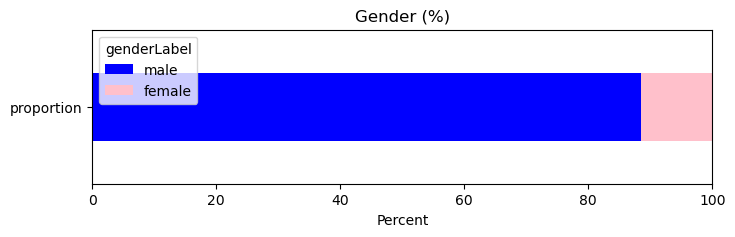

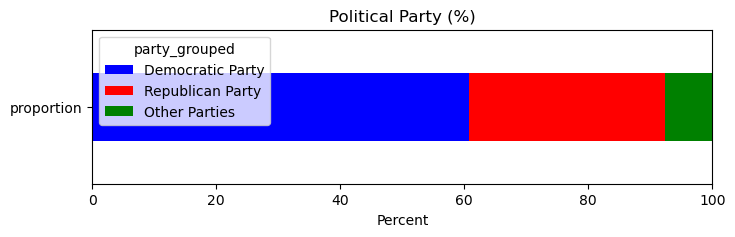

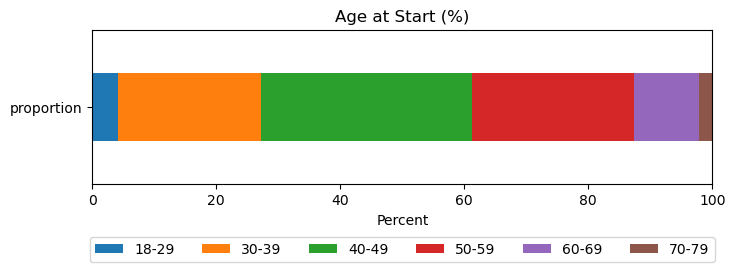

In [4]:
# ---- Gender ----
gender = df["genderLabel"].value_counts(normalize=True).mul(100)
gender = gender.reindex(["male", "female"]).fillna(0)
gender.to_frame().T.plot(kind="barh", stacked=True, figsize=(8,2), 
                         color=["blue","pink"], xlim=[0,100], width=0.4,
                         legend=True, title="Gender (%)")
plt.xlabel("Percent")
plt.show()

# ---- Party ----
df["party_grouped"] = df["partyLabel"].apply(
    lambda x: x if x in ["Democratic Party","Republican Party"] else "Other Parties"
)
party = df["party_grouped"].value_counts(normalize=True).mul(100)
party = party.reindex(["Democratic Party","Republican Party","Other Parties"]).fillna(0)
party.to_frame().T.plot(kind="barh", stacked=True, figsize=(8,2), 
                        color=["blue","red","green"], xlim=[0,100], width=0.4,
                        legend=True, title="Political Party (%)")
plt.xlabel("Percent")
plt.show()

# ---- Age ----
bins = [18,30,40,50,60,70,80]
labels = ["18-29","30-39","40-49","50-59","60-69","70-79"]
df["age_group"] = pd.cut(df["age_at_start"], bins=bins, labels=labels, right=False)
age = df["age_group"].value_counts(normalize=True).mul(100).reindex(labels).fillna(0)
age.to_frame().T.plot(kind="barh", stacked=True, figsize=(8,2), 
                      width=0.4, xlim=[0,100], legend=True, title="Age at Start (%)")
plt.xlabel("Percent")
plt.legend(loc="upper center", bbox_to_anchor=(0.5, -0.3), ncol=len(labels))
plt.show()

In [5]:
# Define periods
PERIODS = [
    (1821, 1840, "1821–1840"),
    (1841, 1860, "1841–1860"),
    (1861, 1880, "1861–1880"),
    (1881, 1900, "1881–1900"),
    (1901, 1920, "1901–1920"),
    (1921, 1940, "1921–1940"),
    (1941, 1960, "1941–1960"),
    (1961, 1980, "1961–1980"),
    (1981, 2000, "1981–2000"),
    (2001, 2020, "2001–2020"),
    (2021, 2040, "2021–2040"),
]

# Assign periods
def get_period(year):
    for start, end, label in PERIODS:
        if start <= year <= end:
            return label
    return None

df["period"] = df["start_year"].apply(get_period)

# ----------------- Gender -----------------
gender_counts = df.groupby(["period", "genderLabel"]).size().unstack(fill_value=0)
gender_freq = gender_counts.div(gender_counts.sum(axis=1), axis=0).mul(100).round(2)

print("---- Gender counts ----\n", gender_counts)
print("\n---- Gender frequencies (%) ----\n", gender_freq)

# ----------------- Party -----------------
df["party_grouped"] = df["partyLabel"].apply(
    lambda x: x if x in ["Democratic Party", "Republican Party"] else "Other Parties"
)

party_counts = df.groupby(["period", "party_grouped"]).size().unstack(fill_value=0)
party_freq = party_counts.div(party_counts.sum(axis=1), axis=0).mul(100).round(2)

print("\n---- Party counts ----\n", party_counts)
print("\n---- Party frequencies (%) ----\n", party_freq)

# ----------------- Age groups -----------------
bins = [18, 30, 40, 50, 60, 70, 80]
labels = ["18-29", "30-39", "40-49", "50-59", "60-69", "70-79"]
df["age_group"] = pd.cut(df["age_at_start"], bins=bins, labels=labels, right=False)

age_counts = df.groupby(["period", "age_group"]).size().unstack(fill_value=0)
age_freq = age_counts.div(age_counts.sum(axis=1), axis=0).mul(100).round(2)

print("\n---- Age counts ----\n", age_counts)
print("\n---- Age frequencies (%) ----\n", age_freq)

---- Gender counts ----
 genderLabel  female  male
period                   
1821–1840         0     8
1841–1860         0    52
1861–1880         0    73
1881–1900         0    89
1901–1920         1    83
1921–1940         0    58
1941–1960         1    60
1961–1980         9   101
1981–2000        35   146
2001–2020        64   175
2021–2040         0     2

---- Gender frequencies (%) ----
 genderLabel  female    male
period                     
1821–1840      0.00  100.00
1841–1860      0.00  100.00
1861–1880      0.00  100.00
1881–1900      0.00  100.00
1901–1920      1.19   98.81
1921–1940      0.00  100.00
1941–1960      1.64   98.36
1961–1980      8.18   91.82
1981–2000     19.34   80.66
2001–2020     26.78   73.22
2021–2040      0.00  100.00

---- Party counts ----
 party_grouped  Democratic Party  Other Parties  Republican Party
period                                                          
1821–1840                     4              3                 1
1841–1860         

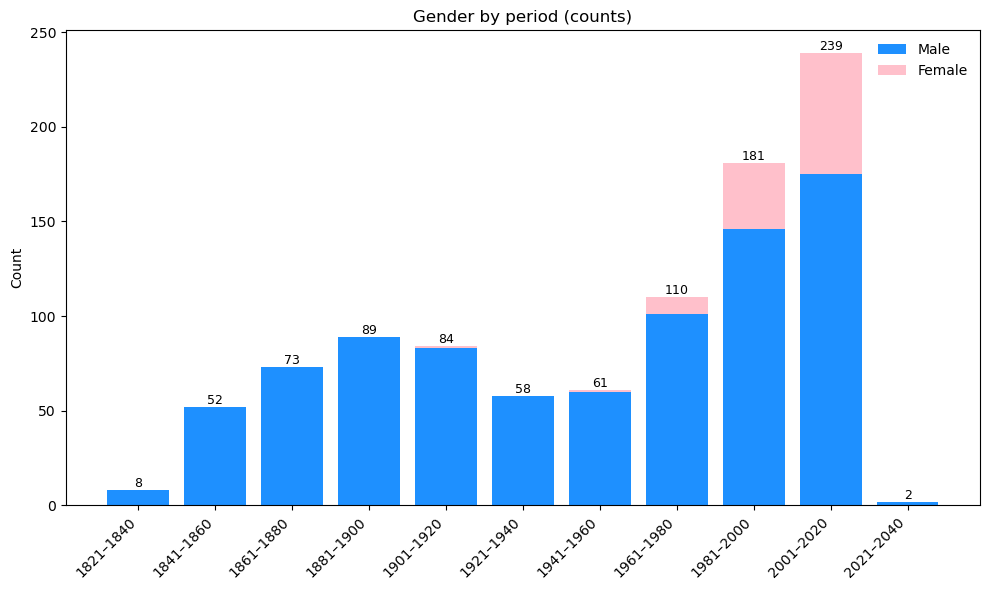

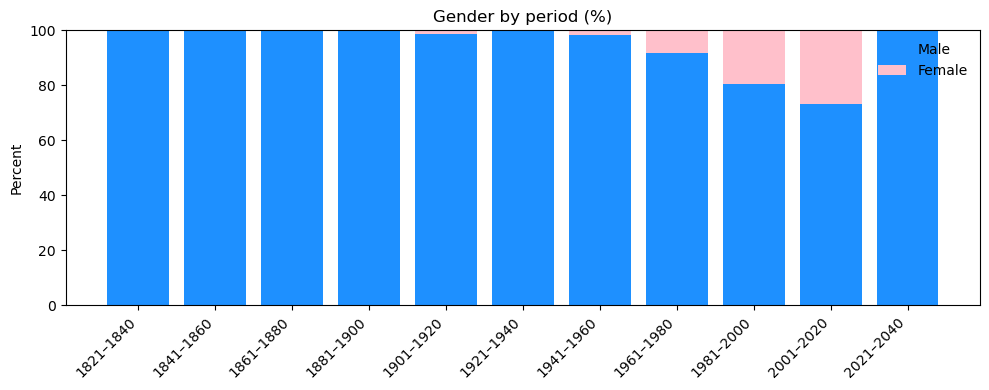

In [15]:
periods = gender_counts.index
male_c = gender_counts.reindex(periods)["male"]
fem_c  = gender_counts.reindex(periods)["female"]

# 1) Counts (stacked) + total labels
plt.figure(figsize=(10,6))
plt.bar(periods, male_c, label="Male", color="dodgerblue")
plt.bar(periods, fem_c,  bottom=male_c, label="Female", color="pink")
totals = male_c + fem_c
for i, t in enumerate(totals):
    plt.text(i, t, int(t), ha="center", va="bottom", fontsize=9)
plt.ylabel("Count"); plt.title("Gender by period (counts)")
plt.xticks(rotation=45, ha="right"); plt.legend(frameon=False); plt.tight_layout()

# 2) Frequencies (stacked to 100)
male_f = gender_freq.reindex(periods)["male"]
fem_f  = gender_freq.reindex(periods)["female"]
plt.figure(figsize=(10,4))
plt.bar(periods, male_f, label="Male", color="dodgerblue")
plt.bar(periods, fem_f,  bottom=male_f, label="Female", color="pink")
plt.ylabel("Percent"); plt.title("Gender by period (%)"); plt.ylim(0,100)
plt.xticks(rotation=45, ha="right"); plt.legend(frameon=False); plt.tight_layout()

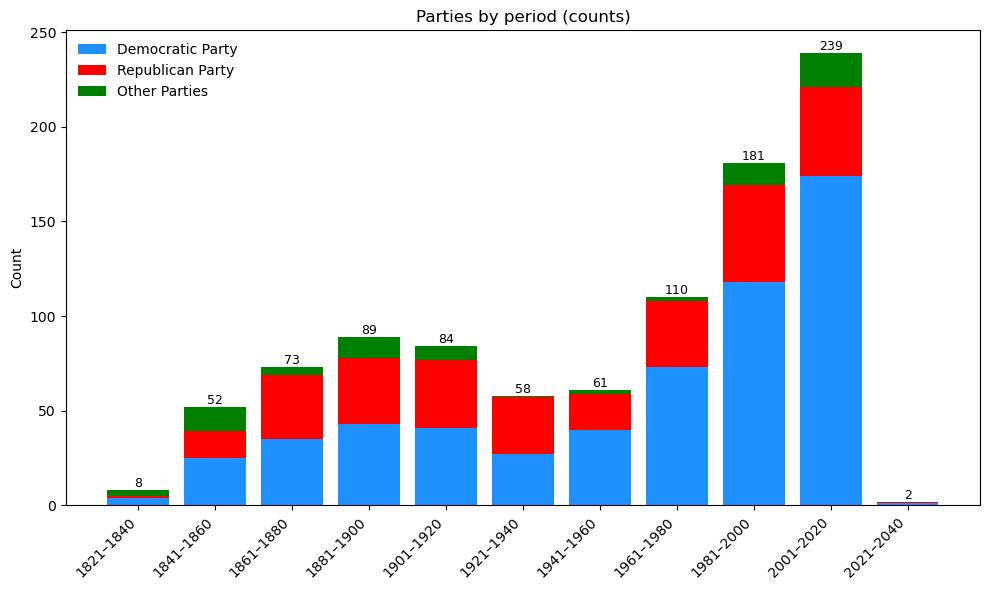

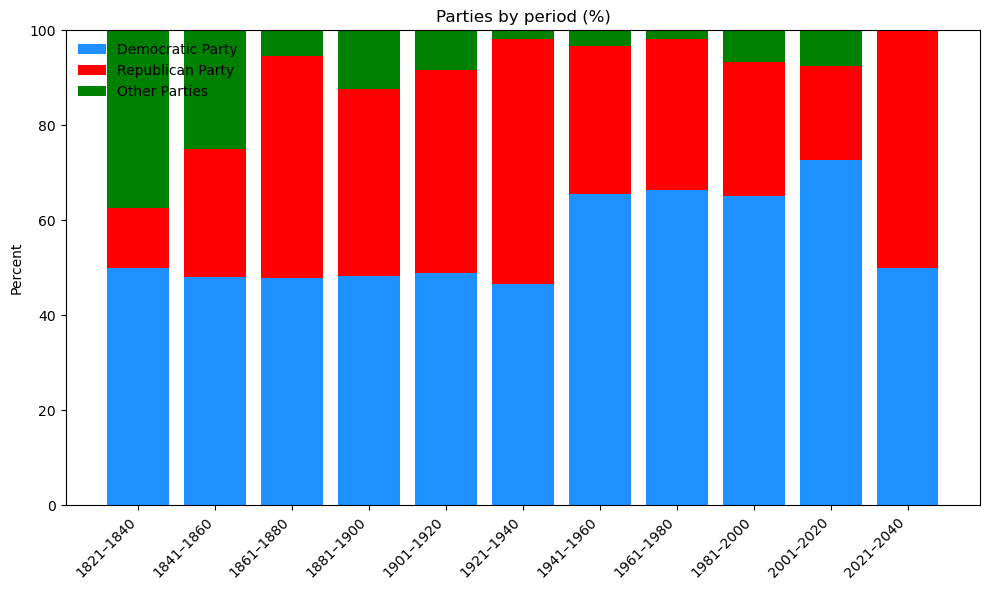

In [13]:
# ----------------- Parties -----------------
periods = party_counts.index
party_order = ["Democratic Party", "Republican Party", "Other Parties"]

pc = party_counts.reindex(index=periods, columns=party_order, fill_value=0)
pf = party_freq.reindex(index=periods, columns=party_order, fill_value=0)

# 1) Party counts + totals
plt.figure(figsize=(10,6))
bottom = 0
for col, c in zip(pc.columns, ["dodgerblue", "red", "green"]):
    plt.bar(periods, pc[col], bottom=bottom, label=col, color=c)
    bottom = bottom + pc[col]
totals = pc.sum(axis=1)
for i, t in enumerate(totals):
    plt.text(i, t, int(t), ha="center", va="bottom", fontsize=9)
plt.ylabel("Count"); plt.title("Parties by period (counts)")
plt.xticks(rotation=45, ha="right"); plt.legend(frameon=False); plt.tight_layout()

# 2) Party frequencies (to 100)
plt.figure(figsize=(10,6))
bottom = 0
for col, c in zip(pf.columns, ["dodgerblue", "red", "green"]):
    plt.bar(periods, pf[col], bottom=bottom, label=col, color=c)
    bottom = bottom + pf[col]
plt.ylabel("Percent"); plt.title("Parties by period (%)"); plt.ylim(0,100)
plt.xticks(rotation=45, ha="right"); plt.legend(frameon=False); plt.tight_layout()


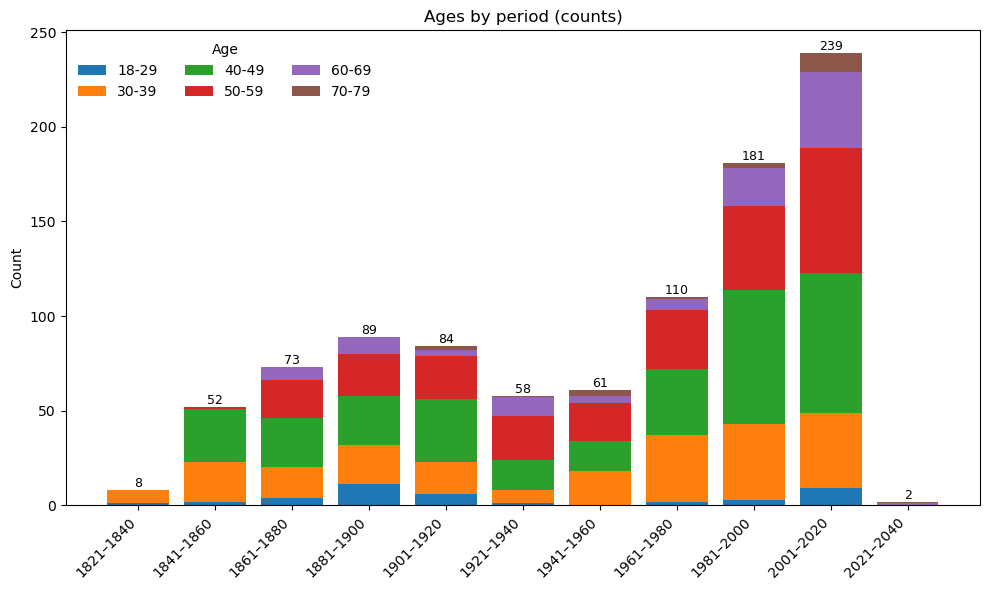

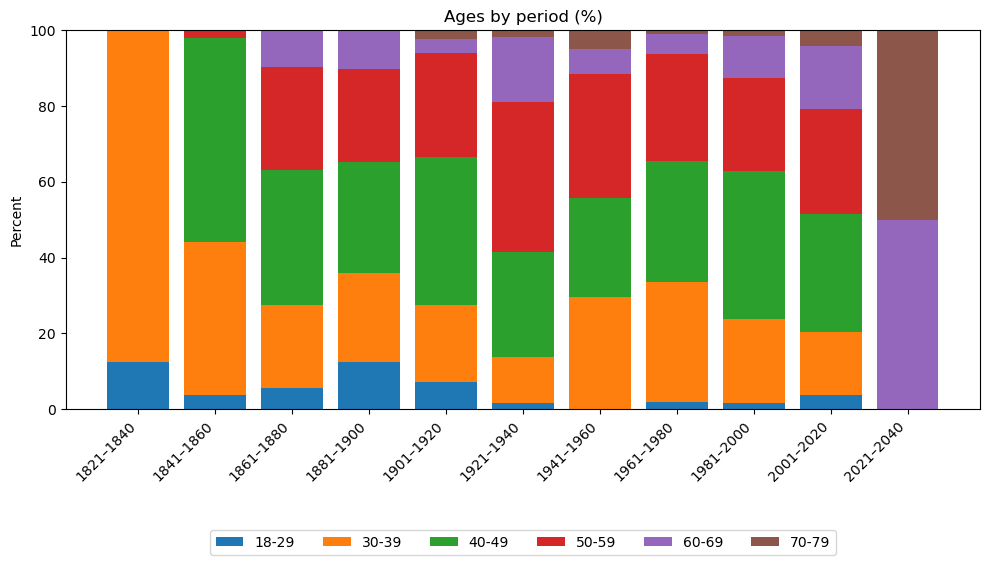

In [12]:
# ----------------- Ages -----------------
age_order = ["18-29","30-39","40-49","50-59","60-69","70-79"]
ac = age_counts.reindex(index=periods, columns=age_order, fill_value=0)
af = age_freq.reindex(index=periods, columns=age_order, fill_value=0)

# 3) Age counts + totals
plt.figure(figsize=(10,6))
bottom = 0
for col in ac.columns:
    plt.bar(periods, ac[col], bottom=bottom, label=col)  # use default colors to keep it short
    bottom = bottom + ac[col]
totals = ac.sum(axis=1)
for i, t in enumerate(totals):
    plt.text(i, t, int(t), ha="center", va="bottom", fontsize=9)
plt.ylabel("Count"); plt.title("Ages by period (counts)")
plt.xticks(rotation=45, ha="right"); plt.legend(title="Age", frameon=False, ncol=3); plt.tight_layout()

# 4) Age frequencies (to 100)
plt.figure(figsize=(10,6))
bottom = 0
for col in af.columns:
    plt.bar(periods, af[col], bottom=bottom, label=col)
    bottom = bottom + af[col]
plt.ylabel("Percent"); plt.title("Ages by period (%)"); plt.ylim(0,100)
plt.xticks(rotation=45, ha="right"); 
plt.legend(loc="upper center", bbox_to_anchor=(0.5, -0.3), ncol=len(labels));
plt.tight_layout()